前処理の段階でall_data作成

# インポート

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import pandas_profiling as pdp
import numpy as np

import lightgbm as lgb

#回帰の可視化
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

import shap
# import xgboost

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

import warnings
warnings.filterwarnings('ignore')

# 関数

In [2]:
import gather_function

In [3]:
import importlib
importlib.reload(gather_function)

<module 'gather_function' from '/Users/ryosuke/Desktop/副業/AI Quest/assessment/gather_function.py'>

# データの読み込み

In [4]:
original_train_data = pd.read_csv('train.csv')
original_test_data = pd.read_csv('test.csv')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

del train['id']
del test['id']

print('len(train)=', len(train))
print('len(test_x)', len(test))
print(len(test)/len(train))

len(train)= 55583
len(test_x) 18528
0.3333393303707968


In [6]:
train.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


# 説明変数

|カラム|ヘッダ名称|データ型|説明|
|-|-|-|-|
|0|	id|	int| インデックスとして使用|
|1|	accommodates|	int|	収容可能人数|
|2|	amenities|	char|	アメニティ|
|3|	bathrooms|	float|	風呂数|
|4|	bed_type|	char|	ベッドの種類|
|5|	bedrooms|	float|	ベッドルーム数|
|6|	beds|	float|	ベッド数|
|7|	cancellation_policy|	char|	キャンセルポリシー|
|8|	city|	char|	都市|
|9|	cleaning_fee|	int|	クリーニング料金を含むか|
|10|	description|	char|	説明|
|11|	first_review|	char|	最初のレビュー日|
|12|	host_has_profile_pic|	int|	ホストの写真があるかどうか|
|13|	host_identity_verified|	int|	ホストの身元確認が取れているか|
|14|	host_response_rate|	char|	ホストの返信率|
|15|	host_since|	char|	ホストの登録日|
|16|	instant_bookable|	char|	即時予約可能か|
|17|	last_review	|char|	最後のレビュー日|
|18|	latitude|	float|	緯度|
|19|longitude|	float|	経度|
|20|	name|	char|	物件名|
|21|	neighbourhood|	char|	近隣情報|
|22|	number_of_reviews|	int|	レビュー数|
|23|	property_type|	char|	物件の種類|
|24|	review_scores_rating|	float|	レビュースコア|
|25|	room_type|	char|	部屋の種類|
|26|	thumbnail_url|	char|	サムネイル画像リンク|
|27|	zipcode|	int|	郵便番号|
|28|    y| float|	宿泊価格|

# トレーニング

In [7]:
#学習データを目的変数とそれ以外に分ける
train_X = train.drop('y', axis=1)
train_y = train['y']

test_X = test.copy()

#学習データとテストデータを統合
all_data_X = pd.concat([train_X,test_X],axis=0,sort=True)

In [8]:
#それぞれのデータのサイズを確認
print("train_X: "+str(train_X.shape))
print("train_y: "+str(train_y.shape))
print("test_X: "+str(test_X.shape))
print("all_data_X: "+str(all_data_X.shape))

train_X: (55583, 27)
train_y: (55583,)
test_X: (18528, 27)
all_data_X: (74111, 27)


In [9]:
all_data_X.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024


## 説明変数の前処理

### EDA結果の追加

In [10]:
all_data_X_addEDA, max_amenities_list = gather_function.preprocessing(all_data_X)


100%|███████████████████████████████████████████| 86/86 [00:03<00:00, 23.33it/s]


In [11]:
all_data_X_addEDA[all_data_X_addEDA.columns[:99]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Data columns (total 99 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   accommodates                       74111 non-null  int64  
 1   bathrooms                          74111 non-null  int64  
 2   bed_type                           74111 non-null  object 
 3   bedrooms                           74111 non-null  int64  
 4   beds                               74111 non-null  int64  
 5   cancellation_policy                74111 non-null  object 
 6   city                               74111 non-null  object 
 7   cleaning_fee                       74111 non-null  object 
 8   host_has_profile_pic               74111 non-null  object 
 9   host_identity_verified             74111 non-null  object 
 10  host_response_rate                 74111 non-null  int64  
 11  instant_bookable                   74111 non-null  obj

In [12]:
all_data_X_addEDA[all_data_X_addEDA.columns[100:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Disabled parking spot_add                74111 non-null  object 
 1   Wide clearance to bed_add                74111 non-null  object 
 2   Accessible-height bed_add                74111 non-null  object 
 3   Fixed grab bars for shower & toilet_add  74111 non-null  object 
 4   Bathtub with shower chair_add            74111 non-null  object 
 5   Roll-in shower with chair_add            74111 non-null  object 
 6   Accessible-height toilet_add             74111 non-null  object 
 7   Wide clearance to shower & toilet_add    74111 non-null  object 
 8   Wide entryway_add                        74111 non-null  object 
 9   Waterfront_add                           74111 non-null  object 
 10  Handheld shower head_add                 74111

In [13]:
all_data_X_addEDA.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,bathrooms_par_1,bedrooms_par_1,beds_par_1,bed_par_bedrooms,latitude_int,longitude_int,latitude_longitude,review_score_total,review_score_weight,amenities_count,TV_add,Cable TV_add,Wireless Internet_add,Air conditioning_add,Kitchen_add,Free parking on premises_add,Pets allowed_add,Breakfast_add,Elevator_add,Hot tub_add,Indoor fireplace_add,Heating_add,Family/kid friendly_add,Suitable for events_add,Washer_add,Dryer_add,Smoke detector_add,Carbon monoxide detector_add,First aid kit_add,Safety card_add,Fire extinguisher_add,Essentials_add,Shampoo_add,Lock on bedroom door_add,Hangers_add,Hair dryer_add,Iron_add,Laptop friendly workspace_add,Self Check-In_add,Keypad_add,Private entrance_add,Baby monitor_add,Bathtub_add,Baby bath_add,Changing table_add,Children’s books and toys_add,Window guards_add,Table corner guards_add,Fireplace guards_add,Babysitter recommendations_add,Crib_add,Room-darkening shades_add,Game console_add,Hot water_add,Bed linens_add,Extra pillows and blankets_add,Ethernet connection_add,Pocket wifi_add,Microwave_add,Coffee maker_add,Refrigerator_add,Dishwasher_add,Dishes and silverware_add,Cooking basics_add,Oven_add,Stove_add,EV charger_add,Single level home_add,BBQ grill_add,Patio or balcony_add,Garden or backyard_add,Beach essentials_add,Luggage dropoff allowed_add,Long term stays allowed_add,Wide hallway clearance_add,Step-free access_add,Wide doorway_add,Flat_add,smooth pathway to front door_add,Well-lit path to entrance_add,Disabled parking spot_add,Wide clearance to bed_add,Accessible-height bed_add,Fixed grab bars for shower & toilet_add,Bathtub with shower chair_add,Roll-in shower with chair_add,Accessible-height toilet_add,Wide clearance to shower & toilet_add,Wide entryway_add,Waterfront_add,Handheld shower head_add,rare_amenities_count,description_word_count,host_response_rate_weight,first_review_Year,first_review_Month,first_review_Day,BusinessOld,host_since_Year,host_since_Month,host_since_Day,BusinessOld2,first_reviewOld,last_review_Year,last_review_Month,last_review_Day,BusinessOld3,BusinessUpdate,BusinessPeriod,thumbnail_url_str,zipcode_int
0,6,2,Real Bed,1,4,flexible,LA,t,t,f,0,f,33.788931,-118.154761,Na,1,Apartment,60.0,Private room,NaN,0.333333,0.166667,0.666667,4.0,33,-118,-3992.323034,60.0,0.594059,7,True,False,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,379,0.000000,2016.0,7.0,27.0,2809.0,2016.0,7.0,13.0,3054.0,14.0,2016.0,7.0,27.0,2809.0,1982.0,0.0,nan,90804
1,2,1,Real Bed,1,1,strict,DC,t,t,t,100,f,38.934810,-76.978190,Brookland,9,House,100.0,Private room,1.0,0.500000,0.500000,0.500000,1.0,38,-76,-2997.131205,900.0,0.917431,22,True,True,True,True,True,True,False,False,False,False,False,True,False,False,True,True,True,True,True,False,False,True,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,24,406,91.743119,2016.0,9.0,12.0,2856.0,2015.0,12.0,30.0,2858.0,257.0,2017.0,3.0,31.0,3056.0,1735.0,200.0,1,20018
2,2,2,Real Bed,1,1,strict,NYC,t,t,f,100,t,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,1.0

### 対数変換した説明変数を追加

['beds_par_1', 'bathrooms_par_1', 'bathrooms', 'review_score_total', 'number_of_reviews', 'beds', 'accommodates', 'bedrooms', 'bedrooms_par_1', 'rare_amenities_count', 'amenities_count', 'latitude', 'latitude_longitude', 'host_response_rate_weight', 'review_score_weight', 'description_word_count', 'host_response_rate']


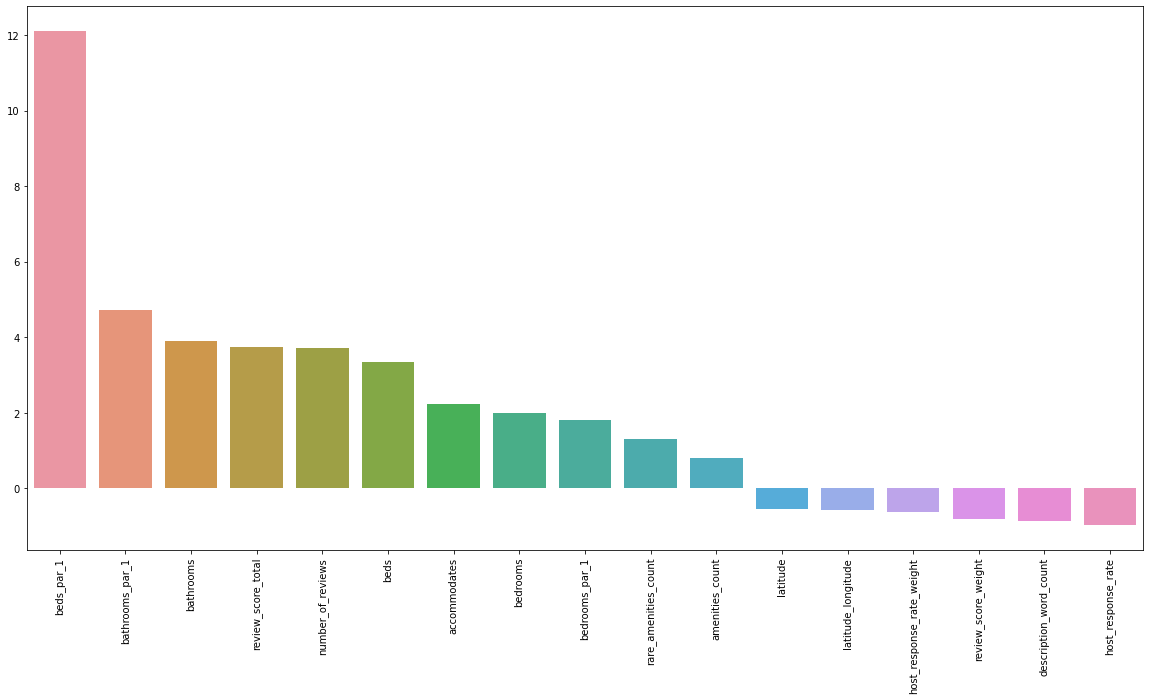

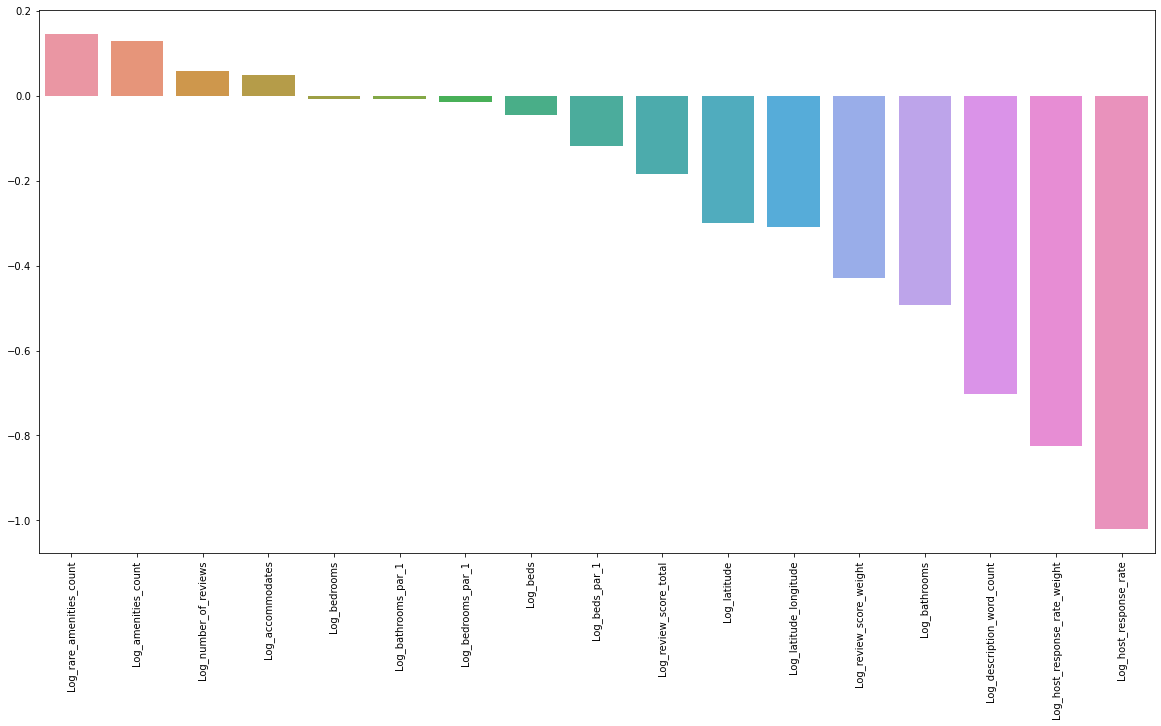

In [14]:
all_data_X_addEDA_log, num_col_feat_list, pt = gather_function.logarithmic_transformation(all_data_X_addEDA)


### カテゴリ変数化

In [15]:
#one-hot変換をせずにlabelencodingする → カテゴリ変数化
categorical_columns = ['neighbourhood']

In [16]:
all_data_X_addEDA_log_dummy = gather_function.process_categorical(all_data_X_addEDA_log, categorical_columns)

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 611.24it/s]


In [17]:
all_data_X_addEDA_log_dummy[all_data_X_addEDA_log_dummy.columns[:99]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 18527
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   accommodates                         74111 non-null  int64   
 1   bathrooms                            74111 non-null  int64   
 2   bedrooms                             74111 non-null  int64   
 3   beds                                 74111 non-null  int64   
 4   host_response_rate                   74111 non-null  int64   
 5   latitude                             74111 non-null  float64 
 6   longitude                            74111 non-null  float64 
 7   neighbourhood                        74111 non-null  category
 8   number_of_reviews                    74111 non-null  int64   
 9   review_scores_rating                 57389 non-null  float64 
 10  thumbnail_url                        65895 non-null  float64 
 11  bathrooms_par_1

## 目的変数の前処理

In [18]:
train_y_ac = train_y / all_data_X_addEDA_log_dummy["accommodates"]
#目的変数の対数log(x+1)をとる
train_y_ac_log = np.log1p(train_y_ac) #②
train_y_log = np.log1p(train_y) #③

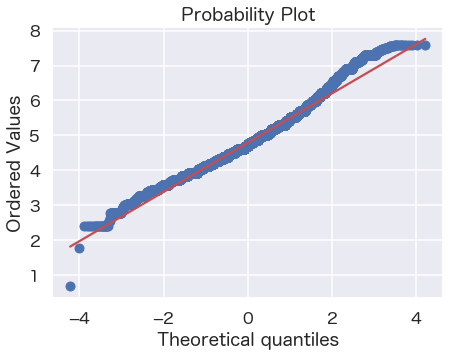

In [26]:
import scipy.stats as stats
 
sns.set(font="Hiragino Maru Gothic Pro",context="talk")
fig = plt.subplots(figsize=(7,5))
 
stats.probplot(train_y_log, dist="norm", plot=plt)
plt.show()

train_y
歪度: 4.264338
尖度: 26.030945
np.exp(train_y_log)
歪度: 4.264338
尖度: 26.030945


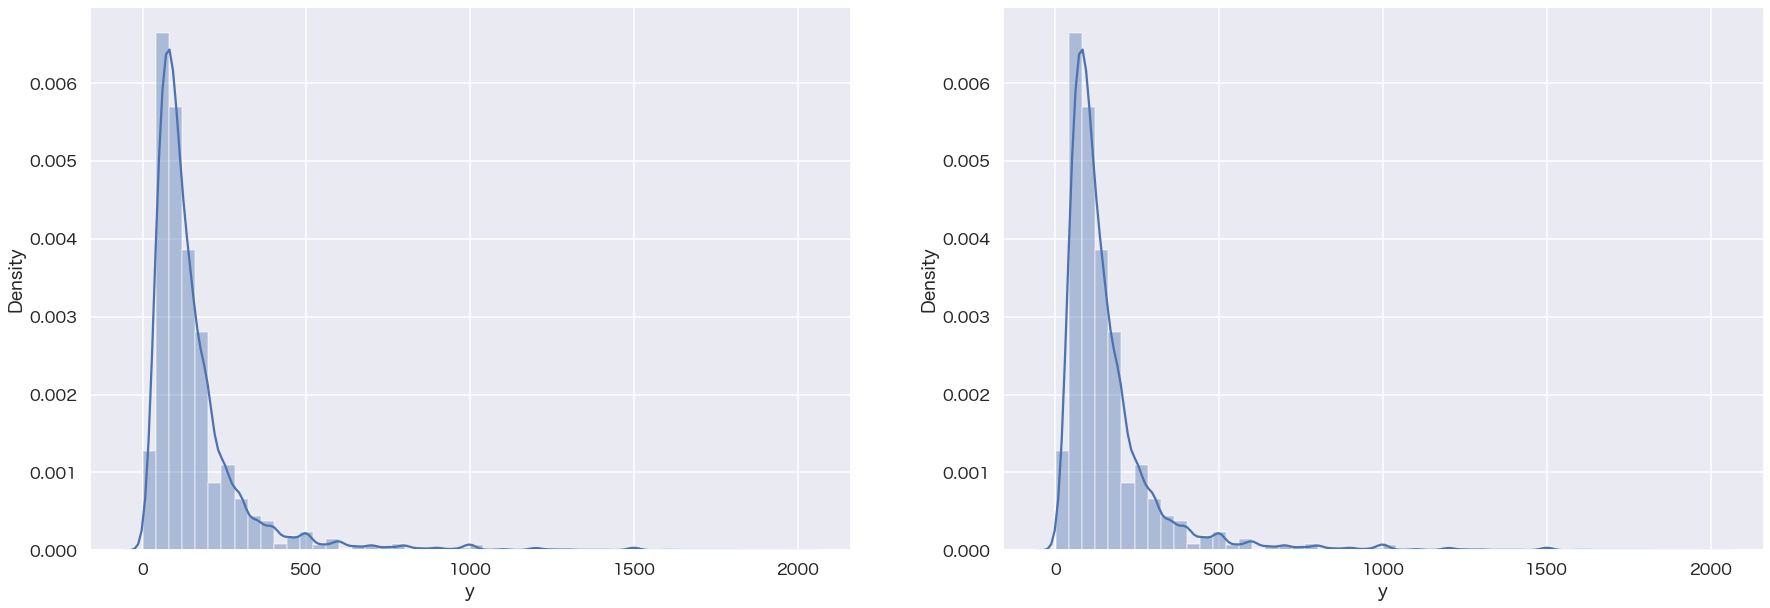

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 10])

sns.distplot(train_y, ax=ax1)
#歪度と尖度を計算
print('train_y')
print("歪度: %f" % train_y.skew())
print("尖度: %f" % train_y.kurt())

print('=============')

sns.distplot(np.exp(train_y_log), ax=ax2)
print('np.exp(train_y_log)')
#歪度と尖度を計算
print("歪度: %f" % np.exp(train_y_log).skew())
print("尖度: %f" % np.exp(train_y_log).kurt())

## データセットの分割

In [28]:
#学習データとテストデータに再分割
train_X_addEDA_log_dummy = all_data_X_addEDA_log_dummy.iloc[:train_X.shape[0],:].reset_index(drop=True)

#submit用
test_X_addEDA_log_dummy = all_data_X_addEDA_log_dummy.iloc[train_X.shape[0]:,:].reset_index(drop=True)

#サイズを確認
print("train_X_addEDA_log_dummy: "+str(train_X_addEDA_log_dummy.shape))
print("test_X_addEDA_log_dummy: "+str(test_X_addEDA_log_dummy.shape))

train_X_addEDA_log_dummy: (55583, 194)
test_X_addEDA_log_dummy: (18528, 194)


In [29]:
presplit_train_X = train_X_addEDA_log_dummy
presplit_train_y = train_y_log

In [42]:
X_trainval, X_test, y_trainval, y_test = train_test_split(presplit_train_X, presplit_train_y, test_size=0.33, random_state=0)

y_trainval
歪度: 0.536812
尖度: 0.652910
y_test
歪度: 0.531730
尖度: 0.680396


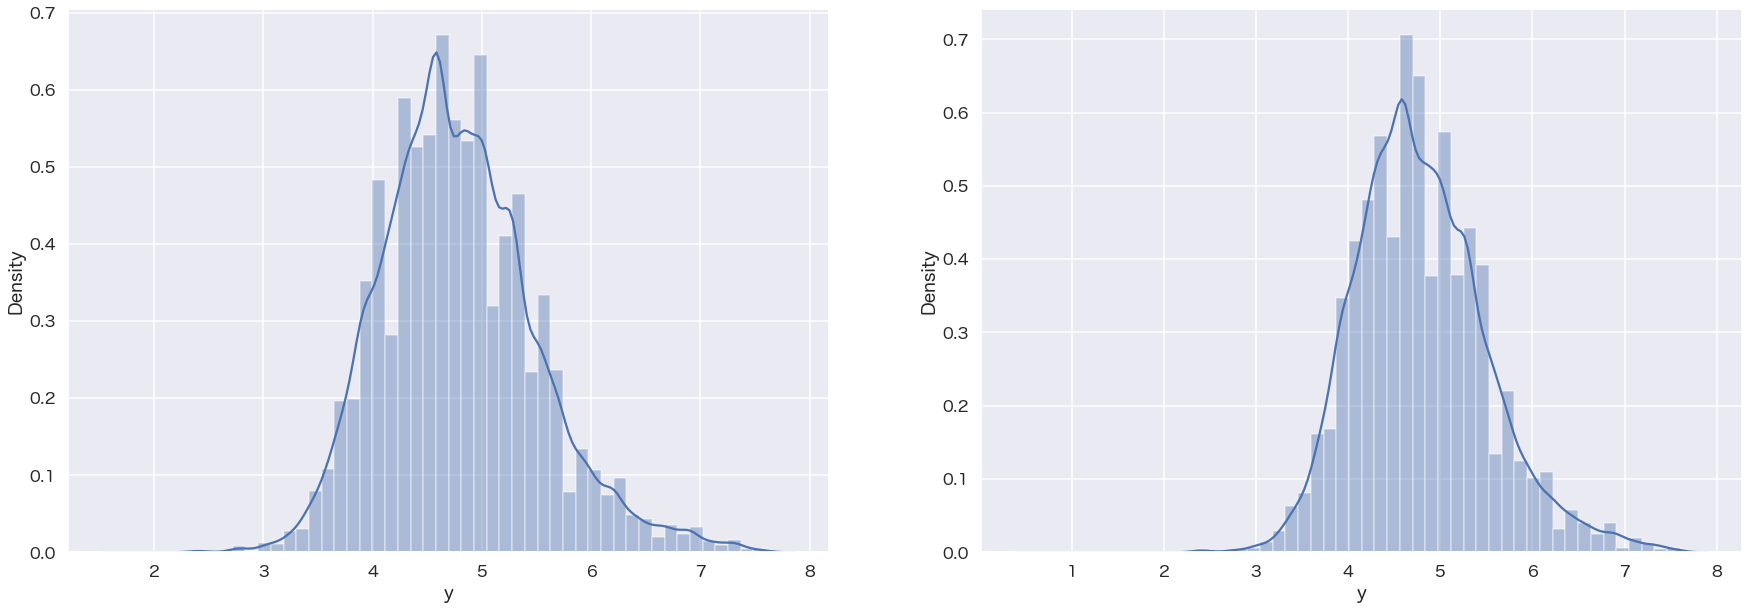

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 10])

sns.distplot(y_trainval, ax=ax1)
#歪度と尖度を計算
print('y_trainval')
print("歪度: %f" % y_trainval.skew())
print("尖度: %f" % y_trainval.kurt())

print('=============')

sns.distplot(y_test, ax=ax2)
print('y_test')
#歪度と尖度を計算
print("歪度: %f" % y_test.skew())
print("尖度: %f" % y_test.kurt())

## パラメータチューニング

In [46]:
import optuna.integration.lightgbm as op_lgb

# LightGBM用のデータセットに変換
op_trainval = lgb.Dataset(X_trainval, y_trainval)

n_splits = 8

In [47]:
# ハイパーパラメータサーチ&モデル構築
op_params = {'objective': 'regression',
          'metric': 'rmse',
          'random_seed':0} 
# クロスバリデーションによるハイパーパラメータの探索
tuner = op_lgb.LightGBMTunerCV(op_params, op_trainval, verbose_eval=100, early_stopping_rounds=100, folds=KFold(n_splits=n_splits))

# ハイパーパラメータ探索の実行
tuner.run()

[I 2021-08-09 03:23:16,567] A new study created in memory with name: no-name-5165b76a-df1d-4863-bab9-9d58a9fb1683
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.376157:  14%|8     | 1/7 [00:16<01:38, 16.45s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.376157:  29%|#7    | 2/7 [00:32<01:21, 16.33s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.376157:  43%|##5   | 3/7 [00:46<01:00, 15.16s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.374843:  57%|###4  | 4/7 [01:07<00:52, 17.42s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.373845:  71%|####2 | 5/7 [01:25<00:35, 17.79s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction, val_score: 0.373845:  86%|#####1| 6/7 [01:41<00:17, 17.12s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:   0%|                   | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:   5%|5          | 1/20 [00:29<09:27, 29.89s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  10%|#1         | 2/20 [00:56<08:23, 27.98s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  15%|#6         | 3/20 [01:20<07:26, 26.28s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  20%|##2        | 4/20 [01:50<07:21, 27.58s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  25%|##7        | 5/20 [02:16<06:47, 27.16s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  30%|###3       | 6/20 [02:42<06:13, 26.70s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  35%|###8       | 7/20 [03:07<05:40, 26.16s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  40%|####4      | 8/20 [03:26<04:46, 23.83s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  45%|####9      | 9/20 [03:52<04:28, 24.40s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  50%|#####     | 10/20 [04:12<03:52, 23.29s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  55%|#####5    | 11/20 [04:30<03:13, 21.51s/it]

[1000]	cv_agg's rmse: 0.384157 + 0.00643889
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006999 seconds.
You can set `force_row_wise=true` to remove the overhea

num_leaves, val_score: 0.373845:  60%|######    | 12/20 [04:53<02:55, 21.98s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  65%|######5   | 13/20 [05:15<02:34, 22.09s/it]

[1000]	cv_agg's rmse: 0.375475 + 0.00794686
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005647 seconds.
You can set `force_row_wise=true` to remove the overhea

num_leaves, val_score: 0.373845:  70%|#######   | 14/20 [05:40<02:16, 22.78s/it]

[400]	cv_agg's rmse: 0.374615 + 0.00739559
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006242 seconds.
You can set `force_row_wise=true` to remove the overhead

num_leaves, val_score: 0.373845:  75%|#######5  | 15/20 [06:00<01:50, 22.13s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  80%|########  | 16/20 [06:23<01:28, 22.21s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  85%|########5 | 17/20 [06:38<01:00, 20.06s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  90%|######### | 18/20 [06:58<00:40, 20.21s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

num_leaves, val_score: 0.373845:  95%|#########5| 19/20 [07:23<00:21, 21.69s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373845:   0%|                      | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373845:  10%|#4            | 1/10 [00:16<02:27, 16.40s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373845:  20%|##8           | 2/10 [00:26<01:41, 12.63s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373845:  30%|####2         | 3/10 [00:38<01:25, 12.18s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373840:  40%|#####6        | 4/10 [00:59<01:33, 15.65s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373500:  50%|#######       | 5/10 [01:21<01:30, 18.05s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373500:  60%|########4     | 6/10 [01:36<01:08, 17.22s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373500:  70%|#########7    | 7/10 [01:51<00:49, 16.43s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

bagging, val_score: 0.373500:  80%|###########2  | 8/10 [02:10<00:34, 17.24s/it]

[600]	cv_agg's rmse: 0.377135 + 0.00745429
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005830 seconds.
You can set `force_row_wise=true` to remove the overhead

bagging, val_score: 0.373500:  90%|############6 | 9/10 [02:25<00:16, 16.54s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction_stage2, val_score: 0.373500:   0%|       | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction_stage2, val_score: 0.373500:  33%|3| 1/3 [00:23<00:47, 23.75s/i[I 2021-08-09 03:36:00,038] Trial 37 finished with value: 0.3736517648030284 and parameters: {'feature_fraction': 0.41600000000000004}. Best is trial 37 with value: 0.3736517648030284.
feature_fraction_stage2, val_score: 0.373500:  33%|3| 1/3 [00:23<00:47, 23.75s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction_stage2, val_score: 0.373500:  67%|6| 2/3 [00:42<00:20, 20.66s/i[I 2021-08-09 03:36:18,542] Trial 38 finished with value: 0.3753201031294493 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 0.3736517648030284.
feature_fraction_stage2, val_score: 0.373500:  67%|6| 2/3 [00:42<00:20, 20.66s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

feature_fraction_stage2, val_score: 0.373500: 100%|#| 3/3 [01:05<00:00, 21.71s/i[I 2021-08-09 03:36:41,488] Trial 39 finished with value: 0.37472482715603606 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.3736517648030284.
feature_fraction_stage2, val_score: 0.373500: 100%|#| 3/3 [01:05<00:00, 21.73s/i
regularization_factors, val_score: 0.373500:   0%|       | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373500:   5%| | 1/20 [00:24<07:52, 24.85s/i[I 2021-08-09 03:37:06,342] Trial 40 finished with value: 0.3736333188254773 and parameters: {'lambda_l1': 0.0030339787507457994, 'lambda_l2': 2.8171662661339483e-08}. Best is trial 40 with value: 0.3736333188254773.
regularization_factors, val_score: 0.373500:   5%| | 1/20 [00:24<07:52, 24.85s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373500:  10%|1| 2/20 [00:52<07:53, 26.29s/i[I 2021-08-09 03:37:33,642] Trial 41 finished with value: 0.3740701771468312 and parameters: {'lambda_l1': 7.6910119369671435, 'lambda_l2': 0.04962723692769471}. Best is trial 40 with value: 0.3736333188254773.
regularization_factors, val_score: 0.373500:  10%|1| 2/20 [00:52<07:53, 26.29s/i

[700]	cv_agg's rmse: 0.374335 + 0.00819132
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009319 seconds.
You can set `force_row_wise=true` to remove the overhead

regularization_factors, val_score: 0.373500:  15%|1| 3/20 [01:11<06:33, 23.13s/i[I 2021-08-09 03:37:53,013] Trial 42 finished with value: 0.37385644037642224 and parameters: {'lambda_l1': 0.12298209141868251, 'lambda_l2': 3.78876600473957e-07}. Best is trial 40 with value: 0.3736333188254773.
regularization_factors, val_score: 0.373500:  15%|1| 3/20 [01:11<06:33, 23.13s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373500:  20%|2| 4/20 [01:37<06:26, 24.13s/i[I 2021-08-09 03:38:18,686] Trial 43 finished with value: 0.3735035341081685 and parameters: {'lambda_l1': 0.014618201064880565, 'lambda_l2': 0.0004135004694529498}. Best is trial 43 with value: 0.3735035341081685.
regularization_factors, val_score: 0.373500:  20%|2| 4/20 [01:37<06:26, 24.13s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373500:  25%|2| 5/20 [01:55<05:30, 22.07s/i[I 2021-08-09 03:38:37,083] Trial 44 finished with value: 0.37430971108453215 and parameters: {'lambda_l1': 8.045831051347294e-08, 'lambda_l2': 3.124150607686233e-08}. Best is trial 43 with value: 0.3735035341081685.
regularization_factors, val_score: 0.373500:  25%|2| 5/20 [01:55<05:30, 22.07s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  30%|3| 6/20 [02:20<05:21, 22.98s/i[I 2021-08-09 03:39:01,836] Trial 45 finished with value: 0.3733770705730382 and parameters: {'lambda_l1': 3.529148220549505e-07, 'lambda_l2': 4.3429665921124565e-05}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  30%|3| 6/20 [02:20<05:21, 22.98s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  35%|3| 7/20 [02:45<05:07, 23.65s/i[I 2021-08-09 03:39:26,856] Trial 46 finished with value: 0.3737282067981214 and parameters: {'lambda_l1': 6.451339773714956e-06, 'lambda_l2': 0.05616568884815642}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  35%|3| 7/20 [02:45<05:07, 23.65s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  40%|4| 8/20 [03:09<04:45, 23.78s/i[I 2021-08-09 03:39:50,928] Trial 47 finished with value: 0.37337986562434855 and parameters: {'lambda_l1': 0.000483763618201587, 'lambda_l2': 4.9712337504547845e-06}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  40%|4| 8/20 [03:09<04:45, 23.78s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  45%|4| 9/20 [03:31<04:15, 23.24s/i[I 2021-08-09 03:40:12,988] Trial 48 finished with value: 0.37381704861771947 and parameters: {'lambda_l1': 2.860937550813744e-07, 'lambda_l2': 0.01101210681111702}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  45%|4| 9/20 [03:31<04:15, 23.24s/i

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  50%|5| 10/20 [03:52<03:44, 22.47s/[I 2021-08-09 03:40:33,719] Trial 49 finished with value: 0.3744326108746171 and parameters: {'lambda_l1': 3.3975904280380223e-05, 'lambda_l2': 3.585576483160626e-05}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  50%|5| 10/20 [03:52<03:44, 22.47s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  55%|5| 11/20 [04:12<03:16, 21.84s/[I 2021-08-09 03:40:54,146] Trial 50 finished with value: 0.37377200310389364 and parameters: {'lambda_l1': 1.0812482578045e-08, 'lambda_l2': 1.1949424621524098}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  55%|5| 11/20 [04:12<03:16, 21.84s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373377:  60%|6| 12/20 [04:35<02:57, 22.21s/[I 2021-08-09 03:41:17,192] Trial 51 finished with value: 0.37358329881875396 and parameters: {'lambda_l1': 0.0001681641609743219, 'lambda_l2': 6.683527388050362e-06}. Best is trial 45 with value: 0.3733770705730382.
regularization_factors, val_score: 0.373377:  60%|6| 12/20 [04:35<02:57, 22.21s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  65%|6| 13/20 [04:58<02:36, 22.40s/[I 2021-08-09 03:41:40,022] Trial 52 finished with value: 0.3733414790728265 and parameters: {'lambda_l1': 1.05534167326728e-06, 'lambda_l2': 3.340447003132869e-06}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  65%|6| 13/20 [04:58<02:36, 22.40s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  70%|7| 14/20 [05:23<02:18, 23.13s/[I 2021-08-09 03:42:04,830] Trial 53 finished with value: 0.3739429718390658 and parameters: {'lambda_l1': 2.9884221028660962e-06, 'lambda_l2': 0.0004000008925681692}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  70%|7| 14/20 [05:23<02:18, 23.13s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  75%|7| 15/20 [05:43<01:51, 22.35s/[I 2021-08-09 03:42:25,395] Trial 54 finished with value: 0.37378179587872806 and parameters: {'lambda_l1': 5.84599137288867e-07, 'lambda_l2': 6.352273081300671e-07}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  75%|7| 15/20 [05:43<01:51, 22.35s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  80%|8| 16/20 [06:08<01:32, 23.11s/[I 2021-08-09 03:42:50,275] Trial 55 finished with value: 0.37339796950308496 and parameters: {'lambda_l1': 2.3236256486995465e-08, 'lambda_l2': 5.490192093474497e-05}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  80%|8| 16/20 [06:08<01:32, 23.11s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  85%|8| 17/20 [06:29<01:07, 22.38s/[I 2021-08-09 03:43:10,956] Trial 56 finished with value: 0.3735300422074318 and parameters: {'lambda_l1': 3.454894396227282e-06, 'lambda_l2': 0.0031351310052433073}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  85%|8| 17/20 [06:29<01:07, 22.38s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373341:  90%|9| 18/20 [06:52<00:45, 22.58s/[I 2021-08-09 03:43:33,995] Trial 57 finished with value: 0.3738469392005299 and parameters: {'lambda_l1': 1.100155495448497e-08, 'lambda_l2': 5.091511675903065e-07}. Best is trial 52 with value: 0.3733414790728265.
regularization_factors, val_score: 0.373341:  90%|9| 18/20 [06:52<00:45, 22.58s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373332:  95%|9| 19/20 [07:17<00:23, 23.26s/[I 2021-08-09 03:43:58,855] Trial 58 finished with value: 0.37333168132846284 and parameters: {'lambda_l1': 5.170052511315501e-07, 'lambda_l2': 1.8915255289580776e-05}. Best is trial 58 with value: 0.37333168132846284.
regularization_factors, val_score: 0.373332:  95%|9| 19/20 [07:17<00:23, 23.26s/

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

regularization_factors, val_score: 0.373332: 100%|#| 20/20 [07:40<00:00, 23.17s/[I 2021-08-09 03:44:21,818] Trial 59 finished with value: 0.3738278337668108 and parameters: {'lambda_l1': 5.1487871536191086e-05, 'lambda_l2': 6.245599690397832e-06}. Best is trial 58 with value: 0.37333168132846284.
regularization_factors, val_score: 0.373332: 100%|#| 20/20 [07:40<00:00, 23.02s/
min_data_in_leaf, val_score: 0.373332:   0%|              | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

min_data_in_leaf, val_score: 0.373332:  20%|#2    | 1/5 [00:23<01:35, 23.99s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

min_data_in_leaf, val_score: 0.373332:  40%|##4   | 2/5 [00:43<01:04, 21.36s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

min_data_in_leaf, val_score: 0.373332:  60%|###6  | 3/5 [01:02<00:40, 20.31s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

min_data_in_leaf, val_score: 0.373332:  80%|####8 | 4/5 [01:26<00:21, 21.60s/it]

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7074
[LightGBM] [Info] Number of data points in the train set: 32585, number of used features: 192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set 

min_data_in_leaf, val_score: 0.373332: 100%|######| 5/5 [01:45<00:00, 21.11s/it]


In [48]:
# サーチしたパラメータの表示
best_params = tuner.best_params
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

  Params: 
    objective: regression
    metric: rmse
    random_seed: 0
    feature_pre_filter: False
    lambda_l1: 5.170052511315501e-07
    lambda_l2: 1.8915255289580776e-05
    num_leaves: 31
    feature_fraction: 0.4
    bagging_fraction: 0.8673546077058483
    bagging_freq: 5
    min_child_samples: 20


## 学習

In [49]:
#チューニングしたパラメータで再度学習と予測をする
y_preds = []
models = []
oof_train = np.zeros((len(X_trainval), ))

kfolds = KFold(n_splits=n_splits, shuffle=True, random_state=0)

test_preds = np.zeros(X_test.shape[0])

evaluation_results_list = []

In [ ]:
for fold_id, (train_cv_no, eval_cv_no) in enumerate(kfolds.split(X_trainval)):
    train_x_cv = X_trainval.iloc[train_cv_no, :]
    train_y_cv = y_trainval.iloc[train_cv_no]
    val_x_cv = X_trainval.iloc[eval_cv_no, :]
    val_y_cv = y_trainval.iloc[eval_cv_no]
    
    lgb_train = lgb.Dataset(train_x_cv, train_y_cv) #(DataFrame, Series)
    lgb_valid = lgb.Dataset(val_x_cv, val_y_cv, reference=lgb_train) #(DataFrame, Series)
    
    params = {
        "objective":"regression",
        "metric":"rmse",
        "verbose":1000,
        "random_seed":0,
        'learning_rate': 0.001,
    }
    params.update(best_params)
    params['num_leaves'] = int(best_params['num_leaves'])
    params['min_child_samples'] = int(best_params['min_child_samples'])
    params['bagging_freq'] = int(best_params['bagging_freq'])
    print(params)
    
    FIT_PARAMS_LGB = {"num_boost_round": 10000, "early_stopping_rounds": 1000,}

    evaluation_results  = {}  # to record evaluation results for plotting
    model = lgb.train(params, 
                  lgb_train,
                   **FIT_PARAMS_LGB,
                  valid_names=['train', 'valid'], 
                  valid_sets=[lgb_train, lgb_valid],
                 evals_result = evaluation_results,)
    
    oof_train[eval_cv_no] = model.predict(val_x_cv, num_iteration=model.best_iteration)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_preds.append(y_pred)
    models.append(model)
    evaluation_results_list.append(evaluation_results)
    
    #submit用の予測をする。Fold数で割って平均値を算出する。
    test_preds += model.predict(X_test, num_iteration=model.best_iteration)
    
test_preds = test_preds / kfolds.n_splits

{'objective': 'regression', 'metric': 'rmse', 'verbose': 1000, 'random_seed': 0, 'learning_rate': 0.001, 'feature_pre_filter': False, 'lambda_l1': 5.170052511315501e-07, 'lambda_l2': 1.8915255289580776e-05, 'num_leaves': 31, 'feature_fraction': 0.4, 'bagging_fraction': 0.8673546077058483, 'bagging_freq': 5, 'min_child_samples': 20}
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.953308
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.631150
[LightGBM] [Debug] init for col-wise cost 0.008346 seconds, init for row-wise cost 0.014279 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 7049
[LightGBM] [Info] Nu

In [ ]:
scores = [
    m.best_score['valid']['rmse'] for m in models
]
score = sum(scores) / len(scores)
print('=== CV score ===')
print(scores)
print(score)

In [ ]:
#特徴量の重要度を可視化
lgb.plot_importance(model, max_num_features=15, figsize=(10,10))
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.plot(evaluation_results['train']['rmse'], label='Train')
ax.plot(evaluation_results['valid']['rmse'], label='valid')
ax.set_xlabel("RMSE")
ax.set_ylabel("Boosting")
ax.set_title('Training performance')
plt.grid()
plt.legend()
plt.show()

In [ ]:
top_n=50
feature_importance_df = pd.DataFrame()

_df = pd.DataFrame()
_df['feature_importance'] = model.feature_importance(importance_type='gain')
_df['column'] = train_x_cv.columns
feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

order = feature_importance_df.groupby('column').sum()[['feature_importance']].sort_values('feature_importance', ascending=False).index[:top_n]

fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
sns.boxenplot(data=feature_importance_df,
              x='feature_importance',
              y='column',
              order=order,
              ax=ax,
              palette='viridis',
              orient='h')
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', rotation=90)
ax.grid()
fig.tight_layout()

# モデルの推論結果

In [ ]:
def validation_test(y_test, test_preds, LOG):
    #RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    #R2 = r2_score(pred_df['true'], pred_df['pred'])
    if LOG == False:
        print('LOGなし')
        pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_preds)], axis=1)
        pred_df.columns = ['true', 'pred']
    else:
        print('LOG戻し済み')
        pred_df = pd.concat([np.exp(y_test).reset_index(drop=True), pd.Series(np.exp(test_preds))], axis=1)
        pred_df.columns = ['true', 'pred']

    # 可視化
    gather_function.True_Pred_map(pred_df)
    sns.jointplot(data=pred_df, x="pred", y="true")

In [ ]:
LOG = True
validation_test(y_test, test_preds, LOG)

In [32]:
pd.Series(test_preds)

0        151.873890
1        161.929526
2        116.792407
3        107.697403
4        198.527606
            ...    
18338     81.325566
18339     27.801031
18340     86.069137
18341    116.635714
18342    180.841708
Length: 18343, dtype: float64

In [ ]:
pd.Series(np.exp(test_preds))

In [ ]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_preds)], axis=1)
pred_df.columns = ['true', 'pred']

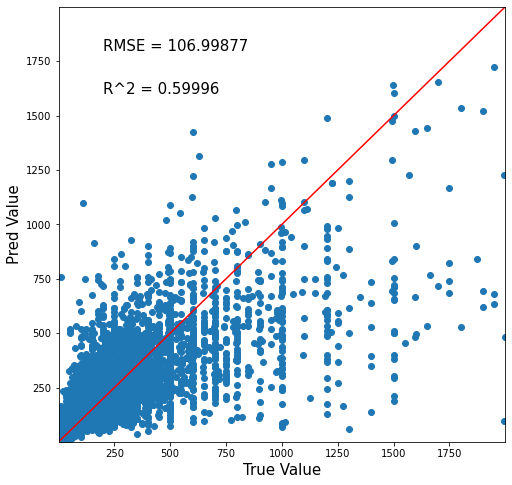

In [33]:
# 可視化
gather_function.True_Pred_map(pred_df)

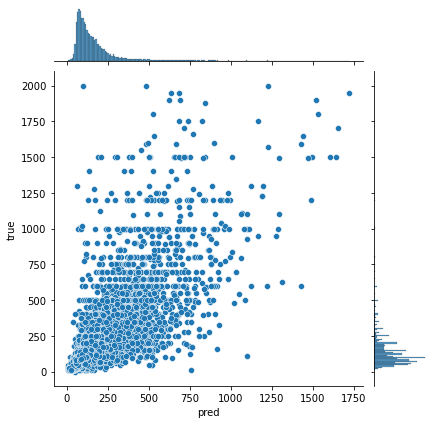

In [34]:
sns.jointplot(data=pred_df, x="pred", y="true")

In [35]:
y_pred = pd.Series(models[2].predict(X_test, num_iteration=models[2].best_iteration))
y_pred

0        167.226472
1        171.399421
2        116.154245
3        108.062101
4        197.194634
            ...    
18338     80.928706
18339     28.608671
18340     87.560988
18341    117.331103
18342    186.631904
Length: 18343, dtype: float64

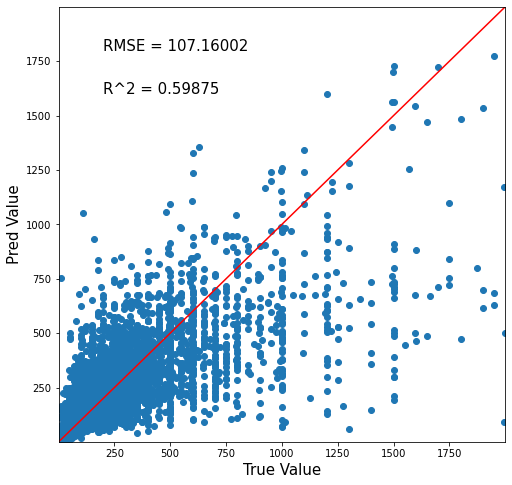

In [36]:
pred_df = pd.concat([y_test.reset_index(drop=True), y_pred], axis=1)
pred_df.columns = ['true', 'pred']
# 可視化
gather_function.True_Pred_map(pred_df)

# サブミット

## テストデータ

In [37]:
test_X_addEDA_log_dummy.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bathrooms_par_1,bedrooms_par_1,beds_par_1,bed_par_bedrooms,latitude_int,longitude_int,latitude_longitude,review_score_total,review_score_weight,amenities_count,rare_amenities_count,description_word_count,host_response_rate_weight,first_review_Year,first_review_Month,first_review_Day,BusinessOld,host_since_Year,host_since_Month,host_since_Day,BusinessOld2,first_reviewOld,last_review_Year,last_review_Month,last_review_Day,BusinessOld3,BusinessUpdate,BusinessPeriod,zipcode_int,Log_beds_par_1,Log_bathrooms_par_1,Log_bathrooms,Log_review_score_total,Log_number_of_reviews,Log_beds,Log_accommodates,Log_bedrooms,Log_bedrooms_par_1,Log_rare_amenities_count,Log_amenities_count,Log_latitude,Log_latitude_longitude,Log_host_response_rate_weight,Log_review_score_weight,Log_description_word_count,Log_host_response_rate,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,TV_add_True,Cable TV_add_True,Wireless Internet_add_True,Air conditioning_add_True,Kitchen_add_True,Free parking on premises_add_True,Pets allowed_add_True,Breakfast_add_True,Elevator_add_True,Hot tub_add_True,Indoor fireplace_add_True,Heating_add_True,Family/kid friendly_add_True,Suitable for events_add_True,Washer_add_True,Dryer_add_True,Smoke detector_add_True,Carbon monoxide detector_add_True,First aid kit_add_True,Safety card_add_True,Fire extinguisher_add_True,Essentials_add_True,Shampoo_add_True,Lock on bedroom door_add_True,Hangers_add_True,Hair dryer_add_True,Iron_add_True,Laptop friendly workspace_add_True,Self Check-In_add_True,Keypad_add_True,Private entrance_add_True,Baby monitor_add_True,Bathtub_add_True,Baby bath_add_True,Changing table_add_True,Children’s books and toys_add_True,Window guards_add_True,Table corner guards_add_True,Fireplace guards_add_True,Babysitter recommendations_add_True,Crib_add_True,Room-darkening shades_add_True,Game console_add_True,Hot water_add_True,Bed linens_add_True,Extra pillows and blankets_add_True,Ethernet connection_add_True,Pocket wifi_add_True,Microwave_add_True,Coffee maker_add_True,Refrigerator_add_True,Dishwasher_add_True,Dishes and silverware_add_True,Cooking basics_add_True,Oven_add_True,Stove_add_True,EV charger_add_True,Single level home_add_True,BBQ grill_add_True,Patio or balcony_add_True,Garden or backyard_add_True,Beach essentials_add_True,Luggage dropoff allowed_add_True,Long term stays allowed_add_True,Wide hallway clearance_add_True,Step-free access_add_True,Wide doorway_add_True,Flat_add_True,smooth pathway to front door_add_True,Well-lit path to entrance_add_True,Disabled parking spot_add_True,Wide clearance to bed_add_True,Accessible-height bed_add_True,Fixed grab bars for shower & toilet_add_True,Bathtub with shower chair_add_True,Roll-in s

In [38]:
#こっちは普通にKFold
sub_preds = np.zeros(test_X_addEDA_log_dummy.shape[0])
for m in models:
    sub_preds += m.predict(test_X_addEDA_log_dummy, num_iteration=model.best_iteration)
sub_preds = sub_preds / kfolds.n_splits
# sub_preds = np.exp(sub_preds)

In [39]:
sub_preds

array([263.95093878, 138.22273927, 102.53421223, ..., 138.95962833,
       112.52458093,  64.17820744])

# Submit

In [40]:
#submit用のCSVを作成
sub = pd.DataFrame({"id":original_test_data['id'], "y":sub_preds})
print('sub["y"].isnull().sum()=', sub['y'].isnull().sum())
sub

sub["y"].isnull().sum()= 0


,id,y
0,0,263.950939
1,1,138.222739
2,2,102.534212
3,3,151.305565
4,4,129.205117
...,...,...
18523,18523,161.779539
18524,18524,113.900665
18525,18525,138.959628
18526,18526,112.524581


In [41]:
sub.to_csv('six_submission.csv', header=False, index=False)